In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
statcast_2017 = pd.read_csv(r'C:\Users\602353\Documents\archive\Statcast_2017.csv')
statcast_2018 = pd.read_csv(r'C:\Users\602353\Documents\archive\Statcast_2018.csv')
statcast_2019 = pd.read_csv(r'C:\Users\602353\Documents\archive\Statcast_2019.csv')
statcast_2021 = pd.read_csv(r'C:\Users\602353\Documents\archive\Statcast_2021.csv')


In [54]:
statcast_2017_pitching = statcast_2017[['pitch_type', 'release_speed', 'player_name', 'release_spin_rate', 'pfx_z', 'pfx_x', 'release_extension', 'game_date']]
statcast_2017_pitching = statcast_2017_pitching.set_axis(['pitch_type', 'velocity', 'pitcher', 'spin_rate', 'vertical_movement', 'horizontal_movement' , 'extension', 'date'], axis=1)
statcast_2017_pitching.dropna(inplace=True) 

statcast_2018_pitching = statcast_2018[['pitch_type', 'release_speed', 'player_name', 'release_spin_rate', 'pfx_z', 'pfx_x', 'release_extension', 'game_date']]
statcast_2018_pitching = statcast_2018_pitching.set_axis(['pitch_type', 'velocity', 'pitcher', 'spin_rate', 'vertical_movement', 'horizontal_movement', 'extension', 'date'], axis=1)
statcast_2018_pitching.dropna(inplace=True) 

statcast_2019_pitching = statcast_2019[['pitch_type', 'release_speed', 'player_name', 'release_spin_rate', 'pfx_z', 'pfx_x', 'release_extension', 'game_date']]
statcast_2019_pitching = statcast_2019_pitching.set_axis(['pitch_type', 'velocity', 'pitcher', 'spin_rate', 'vertical_movement', 'horizontal_movement', 'extension', 'date'], axis=1)
statcast_2019_pitching.dropna(inplace=True) 

statcast_2021_pitching = statcast_2021[['pitch_type', 'release_speed', 'player_name', 'release_spin_rate', 'pfx_z', 'pfx_x', 'release_extension', 'game_date']]
statcast_2021_pitching = statcast_2021_pitching.set_axis(['pitch_type', 'velocity', 'pitcher', 'spin_rate', 'vertical_movement', 'horizontal_movement', 'extension', 'date'], axis=1)
statcast_2021_pitching.dropna(inplace=True)  

In [55]:
statcast_pitching_data = pd.concat([statcast_2017_pitching, statcast_2018_pitching, statcast_2019_pitching, statcast_2021_pitching])
degrom_data = statcast_pitching_data[statcast_pitching_data['pitcher'] == 'deGrom, Jacob'].copy()

degrom_data['year'] = degrom_data['date'].str[:4]

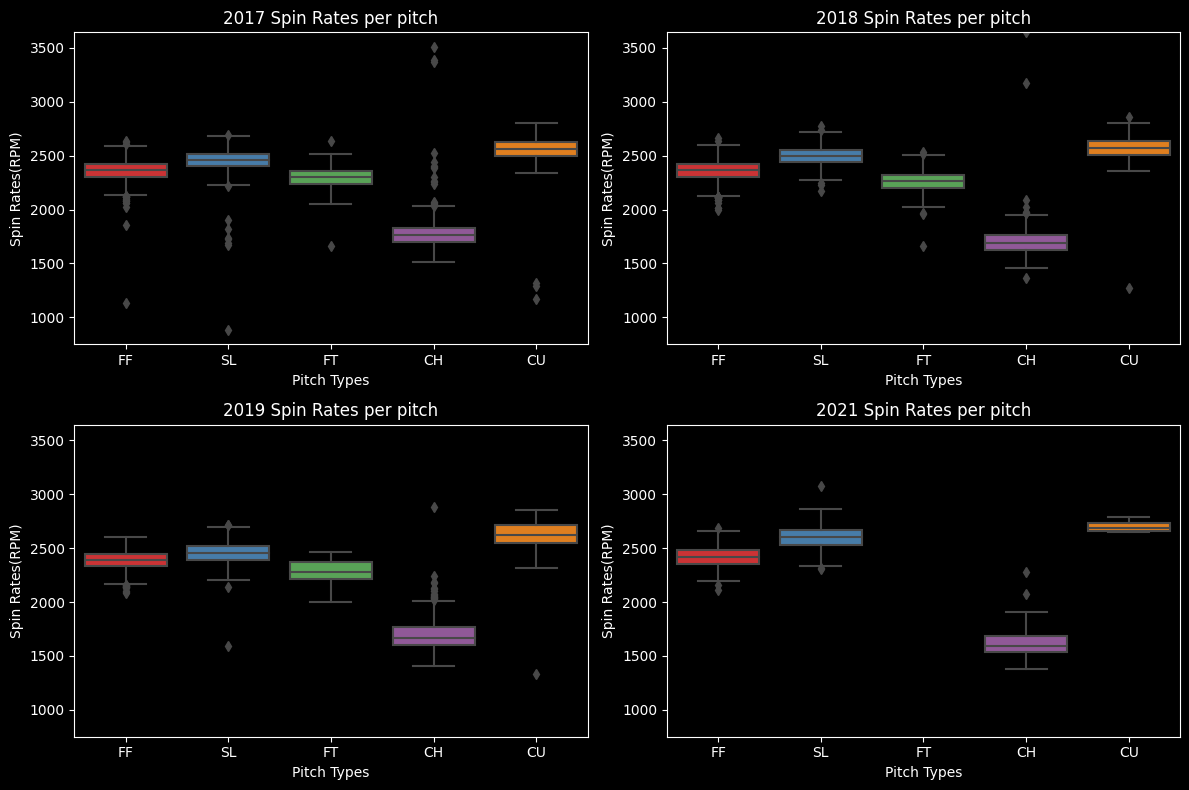

In [56]:
unique_values = degrom_data['year'].unique()
unique_pitch_types = degrom_data['pitch_type'].unique()


color_pallete = sns.color_palette('Set1', n_colors=len(unique_pitch_types))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, value in enumerate(unique_values):
    row = i // 2
    col = i % 2

    filtered_data = degrom_data[degrom_data['year'] == value]

    sns.boxplot(x=filtered_data['pitch_type'], y=filtered_data['spin_rate'], ax=axes[row, col], order= unique_pitch_types, palette=color_pallete)
    axes[row, col].set_title(f'{value} Spin Rates per pitch')
    axes[row, col].set_ylabel('Spin Rates(RPM)')
    axes[row, col].set_xlabel('Pitch Types')
    axes[row, col].set_ylim(axes[0, 0].get_ylim())

plt.tight_layout()
plt.show()

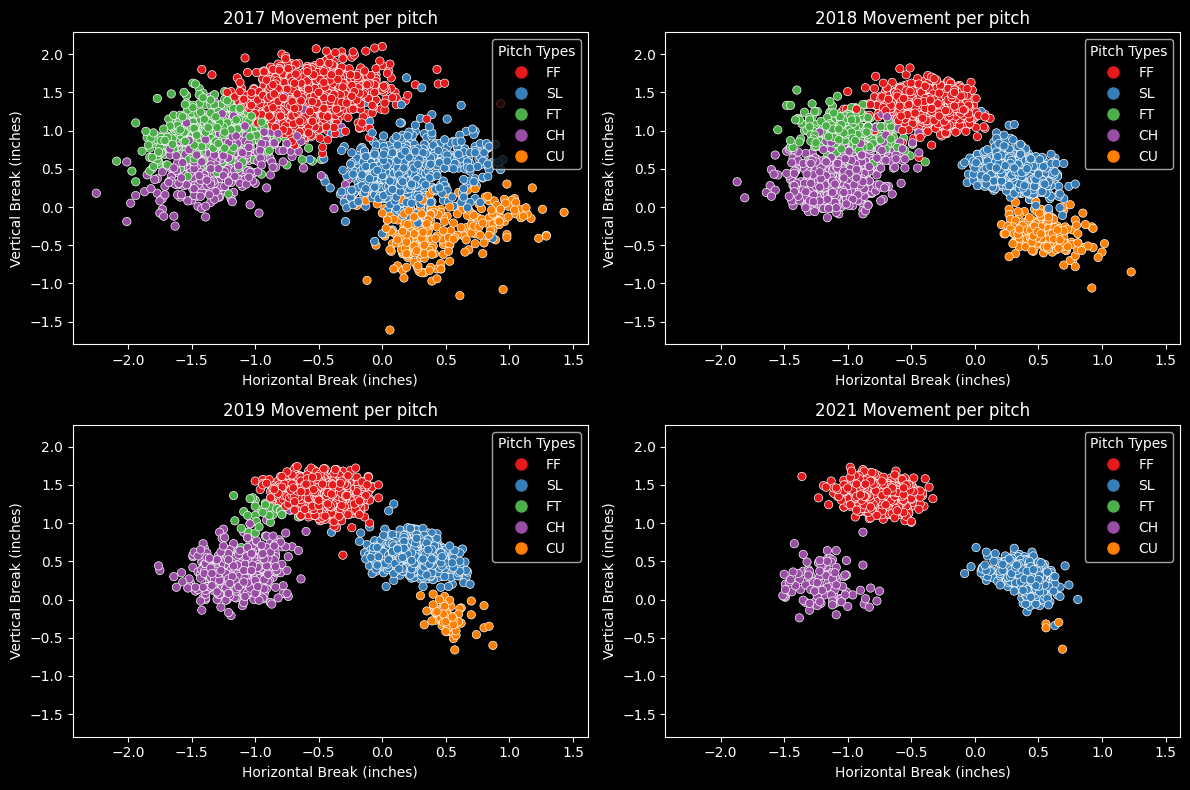

In [57]:
unique_pitch_types = ['FF', 'SL', 'FT', 'CH', 'CU']
unique_years = sorted(degrom_data['year'].unique())

color_mapping = {pitch_type: sns.color_palette('Set1')[i] for i, pitch_type in enumerate(unique_pitch_types)}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, year in enumerate(unique_years):
    row = i // 2
    col = i % 2

    filtered_data = degrom_data[degrom_data['year'] == year]

    colors = [color_mapping[pitch_type] for pitch_type in filtered_data['pitch_type']]

    scatter = sns.scatterplot(x=filtered_data['horizontal_movement'], y=filtered_data['vertical_movement'], hue=filtered_data['pitch_type'], 
                    palette=color_mapping, ax=axes[row, col])
    
    axes[row, col].set_title(f'{year} Movement per pitch')
    axes[row, col].set_ylim(axes[0, 0].get_ylim())
    axes[row, col].set_xlim(axes[0, 0].get_xlim())
    axes[row, col].set_ylabel('Vertical Break (inches)')
    axes[row, col].set_xlabel('Horizontal Break (inches)')

    custom_handles = [plt.Line2D([], [], marker='o', markersize=8, color=color_mapping[pitch_type], linestyle='') for pitch_type in unique_pitch_types]
    custom_labels = unique_pitch_types

    scatter.legend(custom_handles, custom_labels, title='Pitch Types', loc='upper right') 

plt.tight_layout()
plt.show()




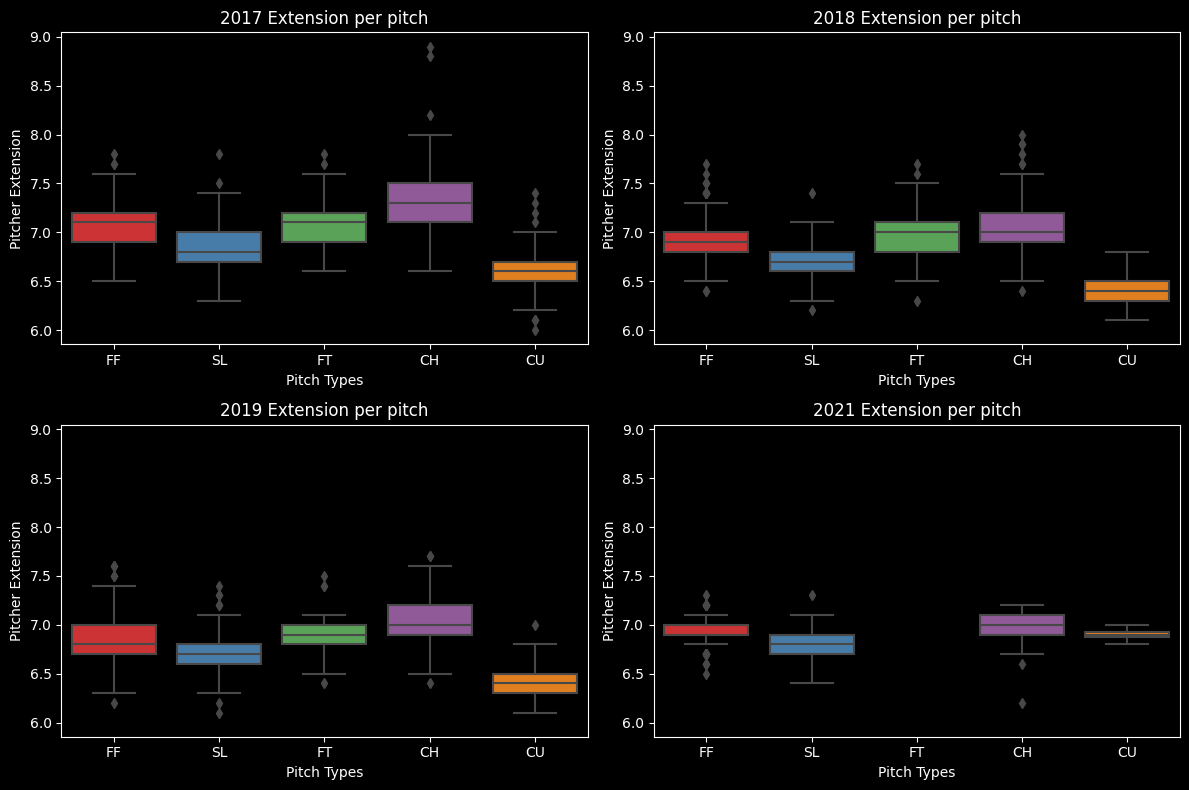

In [61]:
unique_values = degrom_data['year'].unique()
unique_pitch_types = degrom_data['pitch_type'].unique()


color_pallete = sns.color_palette('Set1', n_colors=len(unique_pitch_types))

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, value in enumerate(unique_values):
    row = i // 2
    col = i % 2

    filtered_data = degrom_data[degrom_data['year'] == value]

    sns.boxplot(x=filtered_data['pitch_type'], y=filtered_data['extension'], ax=axes[row, col], order= unique_pitch_types, palette=color_pallete)
    axes[row, col].set_title(f'{value} Extension per pitch')
    axes[row, col].set_ylabel('Pitcher Extension')
    axes[row, col].set_xlabel('Pitch Types')
    axes[row, col].set_ylim(axes[0, 0].get_ylim())

plt.tight_layout()
plt.show()